In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

%matplotlib inline

In [2]:
class AlgorithmsDS:
    """Class with algorithms from GB data analysis algorithms."""

    def __init__(self, n_features, data, target):
        """Constructor."""

        self.weights = np.zeros(n_features).reshape(n_features, 1)
        self.data = data
        self.target = target.reshape(target.shape[0], 1)
        self.errors = []
        self.w_list = [self.weights.copy()]

    def gradient_descent(self, eta=1e-02, max_iter=1e04, min_weight_dist=1e-08):
        """Gradient descent algorithm."""

        iter_num = 0
        weight_dist = np.inf

        while weight_dist > min_weight_dist and iter_num < max_iter:
            target_pred = np.dot(self.data, self.weights)
            
            err = self.calc_mse(self.target, target_pred)
            
            new_weights = self.weights - 2 * eta * (self.data.T @ (target_pred - self.target)) / self.target.shape[0]
            
            weight_dist = np.linalg.norm(new_weights - self.weights, ord=2)
            
            self.errors.append(err)
            self.w_list.append(new_weights.copy())

            iter_num += 1
            self.weights = new_weights

            if iter_num % 100 == 0:
                print(iter_num, self.weights, err)

        self.w_list = np.array(self.w_list)

        print(iter_num, self.weights, err)

    def calc_mse(self, target, target_pred):
        """Mean squared error calculation."""

        err = np.mean((target - target_pred) ** 2)

        return err
    
    def stochastic_gradient_descent(self, eta=1e-04, max_iter=1e05, min_weight_dist=1e-08):
        """Stochastic gradient descent algorithm."""
        
        iter_num = 0
        weight_dist = np.inf
        np.random.seed(1234)
        
        while weight_dist > min_weight_dist and iter_num < max_iter:
            train_ind = np.random.randint(self.data.shape[0])
            
            target_pred = np.dot(self.data[train_ind], self.weights)

            new_weights = self.weights - 2 * eta * np.dot(self.data[train_ind].T.reshape(self.data.shape[1], 1), (target_pred - self.target[train_ind]).reshape(1, 1)) / self.data.shape[1]
            err = self.calc_mse(self.target, self.data @ new_weights)

            weight_dist = np.linalg.norm(new_weights - self.weights, ord=2)
            
            self.errors.append(err)
            self.w_list.append(new_weights.copy())

            iter_num += 1
            self.weights = new_weights
            
            if iter_num % 100 == 0:
                print(iter_num, self.weights, err)

        self.w_list = np.array(self.w_list)

        print(iter_num, self.weights, err)


* 1) Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [3]:
data, target, coef = datasets.make_regression(n_samples=10000, n_features = 2, n_informative = 2, n_targets = 1, 
                                              noise = 5, coef = True, random_state = 2)

In [4]:
struct = AlgorithmsDS(2, data, target)

In [5]:
struct.gradient_descent()

100 [[41.06327849]
 [ 1.59467228]] 67.64804567608608
200 [[46.61322601]
 [ 1.65137705]] 25.953571225952672
300 [[47.36389061]
 [ 1.63907578]] 25.190939919731022
400 [[47.46549254]
 [ 1.63490148]] 25.17695325970542
500 [[47.47925307]
 [ 1.63402106]] 25.1766961535515
600 [[47.48111784]
 [ 1.63386221]] 25.176691418060578
700 [[47.48137069]
 [ 1.63383571]] 25.176691330694105
800 [[47.48140499]
 [ 1.6338315 ]] 25.176691329079958
900 [[47.48140964]
 [ 1.63383085]] 25.176691329050104
921 [[47.4814099 ]
 [ 1.63383081]] 25.176691329049785


In [6]:
means = np.mean(data, axis=0)
stds = np.std(data, axis=0)

for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        data[i][j] = (data[i][j] - means[j])/stds[j]

In [7]:
struct_second = AlgorithmsDS(2, data, target)
struct_second.stochastic_gradient_descent()

100 [[ 0.42033865]
 [-0.00108741]] 2223.22377472696
200 [[0.85549646]
 [0.01211311]] 2182.575750529317
300 [[1.32544576]
 [0.03076188]] 2139.08438619802
400 [[ 1.80475199]
 [-0.00578298]] 2095.4306469502767
500 [[2.04718635]
 [0.01216344]] 2073.362101287817
600 [[2.50150139]
 [0.06432132]] 2032.2442441532314
700 [[2.98430417]
 [0.05468408]] 1989.2870613933042
800 [[3.43367071]
 [0.13419585]] 1949.34553226541
900 [[3.97649213]
 [0.15440788]] 1901.962792570072
1000 [[4.35155751]
 [0.14897655]] 1869.6482811858743
1100 [[4.85537351]
 [0.1419562 ]] 1826.6825833387063
1200 [[5.24920005]
 [0.28566214]] 1792.855878323397
1300 [[5.59576585]
 [0.32516933]] 1763.6999668392814
1400 [[6.00078891]
 [0.34811045]] 1730.0206236068836
1500 [[6.29390772]
 [0.36304307]] 1705.8582765823267
1600 [[6.77412277]
 [0.41052087]] 1666.5639256761735
1700 [[7.16519622]
 [0.32951345]] 1635.3368213806498
1800 [[7.47470348]
 [0.30090283]] 1610.713455747453
1900 [[7.84376897]
 [0.35612209]] 1581.271861316412
2000 [[8.3

16000 [[37.48753069]
 [ 1.55662697]] 120.57057803120375
16100 [[37.58346762]
 [ 1.5526746 ]] 118.70762226318776
16200 [[37.69905833]
 [ 1.55076526]] 116.48616938453563
16300 [[37.80089059]
 [ 1.54005549]] 114.55549054855187
16400 [[37.88987209]
 [ 1.53667559]] 112.88266139230835
16500 [[37.97676079]
 [ 1.51557834]] 111.27342332548268
16600 [[38.07346298]
 [ 1.51801557]] 109.48713285748875
16700 [[38.17986014]
 [ 1.5092395 ]] 107.54931804216584
16800 [[38.25901919]
 [ 1.4997688 ]] 106.12394412375542
16900 [[38.37128537]
 [ 1.50491271]] 104.11392796702572
17000 [[38.45881512]
 [ 1.52175743]] 102.55780533774076
17100 [[38.54241557]
 [ 1.5170261 ]] 101.09649693499513
17200 [[38.61940818]
 [ 1.52619517]] 99.75635845221178
17300 [[38.70202538]
 [ 1.53596099]] 98.33176636640745
17400 [[38.7624402]
 [ 1.5365831]] 97.30175247145534
17500 [[38.83497505]
 [ 1.55372744]] 96.06755437403498
17600 [[38.9174384 ]
 [ 1.56417237]] 94.68152677123459
17700 [[39.00357077]
 [ 1.56318796]] 93.25323981952
178

32100 [[45.33249264]
 [ 1.70499319]] 28.86245166863626
32200 [[45.35273919]
 [ 1.69939696]] 28.784878576453252
32300 [[45.36177846]
 [ 1.6989884 ]] 28.75060408173048
32400 [[45.38830572]
 [ 1.69696583]] 28.65093467699965
32500 [[45.40270197]
 [ 1.69149537]] 28.597309936131985
32600 [[45.42635165]
 [ 1.69155087]] 28.510383394842314
32700 [[45.44563171]
 [ 1.68085712]] 28.44018441961333
32800 [[45.46461335]
 [ 1.68255162]] 28.371961391675146
32900 [[45.48445937]
 [ 1.68456189]] 28.301413138851036
33000 [[45.51397686]
 [ 1.68465019]] 28.197912816955107
33100 [[45.54069078]
 [ 1.68047773]] 28.105701699843372
33200 [[45.54933977]
 [ 1.68021583]] 28.07616419425473
33300 [[45.57841901]
 [ 1.6725412 ]] 27.97796605529704
33400 [[45.59527342]
 [ 1.6773077 ]] 27.92179791730888
33500 [[45.60990364]
 [ 1.66971632]] 27.873566319945613
33600 [[45.62324163]
 [ 1.67555687]] 27.82987872093443
33700 [[45.63174651]
 [ 1.67586616]] 27.80223636297502
33800 [[45.63926321]
 [ 1.67179111]] 27.77794591256155
33

48300 [[46.89787981]
 [ 1.64485738]] 25.300974190778646
48400 [[46.90133229]
 [ 1.64682389]] 25.298479665535154
48500 [[46.9105414]
 [ 1.6359787]] 25.292483545351548
48600 [[46.91695107]
 [ 1.64275626]] 25.287860316394866
48700 [[46.91976966]
 [ 1.65591669]] 25.285706732619232
48800 [[46.92094234]
 [ 1.65469753]] 25.284937158036577
48900 [[46.92372334]
 [ 1.6566459 ]] 25.28308424939945
49000 [[46.92496802]
 [ 1.65933865]] 25.2822588961592
49100 [[46.92444546]
 [ 1.66262656]] 25.28261198127554
49200 [[46.9174951 ]
 [ 1.65728557]] 25.287218980178405
49300 [[46.92812275]
 [ 1.65297196]] 25.280241658214184
49400 [[46.93602747]
 [ 1.65475053]] 25.275151062516162
49500 [[46.93858727]
 [ 1.66010194]] 25.273516255556647
49600 [[46.94294075]
 [ 1.66517603]] 25.2708347435412
49700 [[46.93546825]
 [ 1.65544024]] 25.27549992114646
49800 [[46.93457206]
 [ 1.65708633]] 25.276059559134108
49900 [[46.93653832]
 [ 1.6577124 ]] 25.274809642698695
50000 [[46.94036348]
 [ 1.66231218]] 25.272412115621258
5

64600 [[47.22444723]
 [ 1.64514769]] 25.17569935741575
64700 [[47.2134389 ]
 [ 1.64984274]] 25.176371558885027
64800 [[47.2123651 ]
 [ 1.64286576]] 25.1765874626236
64900 [[47.21418846]
 [ 1.64406555]] 25.176413423258712
65000 [[47.20965909]
 [ 1.65142722]] 25.176668042884195
65100 [[47.2103313 ]
 [ 1.65483596]] 25.176592897052632
65200 [[47.20852545]
 [ 1.64961711]] 25.176786132103487
65300 [[47.21697581]
 [ 1.6493545 ]] 25.17611083733011
65400 [[47.21730888]
 [ 1.65478226]] 25.176048601357838
65500 [[47.21445316]
 [ 1.65696749]] 25.176260641300026
65600 [[47.21548532]
 [ 1.66299477]] 25.176234981301018
65700 [[47.21319931]
 [ 1.67184795]] 25.17661869477909
65800 [[47.22033892]
 [ 1.6608662 ]] 25.175869977959014
65900 [[47.2191461 ]
 [ 1.66509631]] 25.176011312617547
66000 [[47.21720286]
 [ 1.66413616]] 25.176128180696672
66100 [[47.21242328]
 [ 1.66100111]] 25.176447176567155
66200 [[47.20760224]
 [ 1.65911116]] 25.176842904789005
66300 [[47.1923084 ]
 [ 1.66416293]] 25.1785161220052

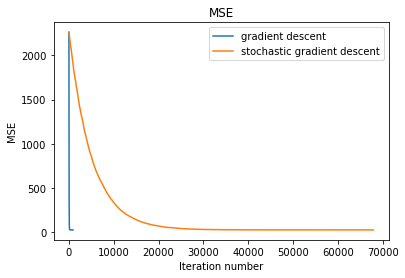

In [8]:
plt.plot(range(len(struct.errors)), struct.errors, label='gradient descent')
plt.plot(range(len(struct_second.errors)), struct_second.errors, label='stochastic gradient descent')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.legend()
plt.show()